In [1]:
%matplotlib inline

# Simple Oscillator Example

This example shows the most simple way of using a solver.
We solve free vibration of a simple oscillator:
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
using the CVODE solver. An analytical solution exists, given by
$$u(t) = u_0 \cos\left(\sqrt{\frac{k}{m}} t\right)+\frac{\dot{u}_0}{\sqrt{\frac{k}{m}}} \sin\left(\sqrt{\frac{k}{m}} t\right)$$

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from scikits.odes import ode

In [3]:
#data of the oscillator
k = 4.0
m = 1.0
#initial position and speed data on t=0, x[0] = u, x[1] = \dot{u}, xp = \dot{x}
initx = [1, 0.1]

We need a first order system, so convert the second order system 
$$m \ddot{u} + k u = 0,\quad u(0) = u_0,\quad \dot{u}(0) = \dot{u}_0$$
into 
$$\left\{ \begin{array}{l}
  \dot u = v\\
  \dot v = \ddot u = -\frac{ku}{m}
\end{array} \right.$$
You need to define a function that computes the right hand side of above equation:

In [4]:
def rhseqn(t, x, xdot):
    """ we create rhs equations for the problem"""
    xdot[0] = x[1]
    xdot[1] = - k/m * x[0]

To solve the ODE you define an ode object, specify the solver to use, here cvode, and pass the right hand side function. You request the solution at specific timepoints by passing an array of times to the solve member.

In [5]:
solver = ode('cvode', rhseqn, old_api=False)
solution = solver.solve([0., 1., 2.], initx)

In [6]:
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
           initx[0]*np.cos(np.sqrt(k/m)*t)+initx[1]*np.sin(np.sqrt(k/m)*t)/np.sqrt(k/m)))



   t        Solution          Exact
------------------------------------
   0               1               1
   1       -0.370694       -0.370682
   2       -0.691508       -0.691484


You can continue the solver by passing further times. Calling the solve routine reinits the solver, so you can restart at whatever time. To continue from the last computed solution, pass the last obtained time and solution. 

**Note:** The solver performes better if it can take into account history information, so avoid calling solve to continue computation!

In general, you must check for errors using the errors output of solve.

In [7]:
#Solve over the next hour by continuation
times = np.linspace(0, 3600, 61)
times[0] = solution.values.t[-1]
solution = solver.solve(times, solution.values.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
           initx[0]*np.cos(np.sqrt(k/m)*t)+initx[1]*np.sin(np.sqrt(k/m)*t)/np.sqrt(k/m)))


Error:  Could not reach endpoint Error at time 24.5780834078
Computed Solutions:

   t        Solution          Exact
------------------------------------
   2       -0.691508       -0.691484


The solution fails at a time around 24 seconds. Erros can be due to many things. Here however the reason is simple: we try to make too large jumps in time output. Increasing the allowed steps the solver can take will fix this. This is the **max_steps** option of cvode:

In [8]:
solver = ode('cvode', rhseqn, old_api=False, max_steps=5000)
solution = solver.solve(times, solution.values.y[-1])
if solution.errors.t:
    print ('Error: ', solution.message, 'Error at time', solution.errors.t)
print ('Computed Solutions:')
print('\n   t        Solution          Exact')
print('------------------------------------')
for t, u in zip(solution.values.t, solution.values.y):
    print('{0:>4.0f} {1:15.6g} {2:15.6g}'.format(t, u[0], 
           initx[0]*np.cos(np.sqrt(k/m)*t)+initx[1]*np.sin(np.sqrt(k/m)*t)/np.sqrt(k/m)))


Computed Solutions:

   t        Solution          Exact
------------------------------------
   2       -0.691508       -0.691484
  60        0.843074        0.843212
 120        0.372884        0.373054
 180       -0.235749       -0.235745
 240       -0.756553       -0.756932
 300       -0.996027       -0.996814
 360       -0.865262       -0.866242
 420       -0.412897       -0.413742
 480        0.192583        0.192521
 540        0.726263        0.727236
 600        0.989879        0.991682
 660        0.885441        0.887581
 720        0.452113        0.453622
 780       -0.149122       -0.148921
 840       -0.694753       -0.696119
 900       -0.981996       -0.984613
 960       -0.904317       -0.907187
1020       -0.490547       -0.492616
1080        0.105433         0.10503
1140        0.661996        0.663643
1200        0.972376         0.97562
1260        0.921229        0.925021
1320        0.527762        0.530648
1380      -0.0616772      -0.0609338
1440       -0.6278

To plot the simple oscillator, we show a (t,x) plot of the solution. Doing this over 60 seconds can be done as follows:

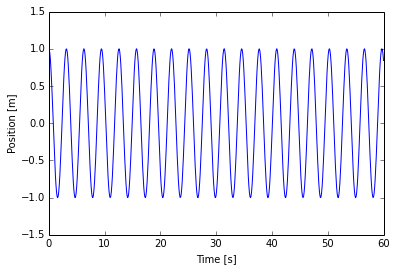

In [9]:
#plot of the oscilator
solver = ode('cvode', rhseqn, old_api=False)
times = np.linspace(0,60,600)
solution = solver.solve(times, initx)
plt.plot(solution.values.t,[x[0] for x in solution.values.y])
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

# Simple Oscillator Example: Stepwise running
When using the *solve* method, you solve over a period of time you decided before. In some problems you might want to solve and decide on the output when to stop. Then you use the *step* method. The same example as above using the step method can be solved as follows. 

You define the ode object selecting the cvode solver. You initialize the solver with the begin time and initial conditions using *init_step*. You compute solutions going forward with the *step* method.

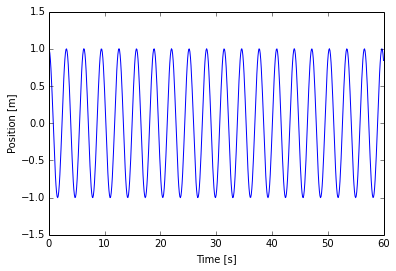

In [10]:
solver = ode('cvode', rhseqn, old_api=False)
time = 0.
solver.init_step(time, initx)
plott = []
plotx = []
while True:
    time += 0.1
    # fix roundoff error at end
    if time > 60: time = 60
    solution = solver.step(time)
    if solution.errors.t:
        print ('Error: ', solution.message, 'Error at time', solution.errors.t)
        break
    #we store output for plotting
    plott.append(solution.values.t)
    plotx.append(solution.values.y[0])
    if time >= 60:
        break
plt.plot(plott,plotx)
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

The solver interpolates solutions to return the solution at the required output times:

In [11]:
print ('plott length:', len(plott), ', last computation times:', plott[-15:]);

plott length: 600 , last computation times: [58.60000000000056, 58.700000000000564, 58.800000000000566, 58.90000000000057, 59.00000000000057, 59.10000000000057, 59.20000000000057, 59.30000000000057, 59.400000000000574, 59.500000000000576, 59.60000000000058, 59.70000000000058, 59.80000000000058, 59.90000000000058, 60.0]


# Simple Oscillator Example: Internal Solver Stepwise running
When using the *solve* method, you solve over a period of time you decided before. With the *step* method you solve by default towards a desired output time after which you can continue solving the problem. 

For full control, you can also compute problems using the solver internal steps. This is not advised, as the number of return steps can be very large, **slowing down** the computation enormously. If you want this nevertheless, you can achieve it with the *one_step_compute* option. Like this:

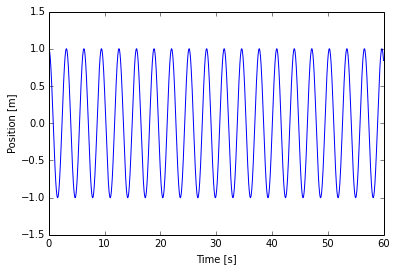

In [12]:
solver = ode('cvode', rhseqn, old_api=False, one_step_compute=True)
time = 0.
solver.init_step(time, initx)
plott = []
plotx = []
while True:
    solution = solver.step(60)
    if solution.errors.t:
        print ('Error: ', solution.message, 'Error at time', solution.errors.t)
        break
    #we store output for plotting
    plott.append(solution.values.t)
    plotx.append(solution.values.y[0]) 
    if solution.values.t >= 60:
        #back up to 60
        solver.set_options(one_step_compute=False)
        solution = solver.step(60)
        plott[-1] = solution.values.t
        plotx[-1] = solution.values.y[0]
        break
plt.plot(plott,plotx)
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

By inspection of the returned times you can see how efficient the solver can solve this problem:

In [13]:
print ('plott length:', len(plott), ', last computation times:', plott[-15:]);

plott length: 1328 , last computation times: [59.2297953049153, 59.28543421477497, 59.34107312463465, 59.39671203449432, 59.452350944353995, 59.50798985421367, 59.56362876407334, 59.61926767393302, 59.67490658379269, 59.730545493652365, 59.78618440351204, 59.84182331337171, 59.897462223231386, 59.95310113309106, 60.0]
